# TP 2 : Décomposition d'une image en fréquences

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1. Image et domaine spectral

In [2]:
def show_images(images,mode=255,gray=False,titre=[""]):
    n=len(images)
    fig=plt.figure( figsize=(3*n, 5*n))
    axs=[]
    
    for i in range(n):
        axs.append( fig.add_subplot(1,n,i+1) )
        axs[i].set_title(titre[i])
        plt.axis('off')
        im = np.clip(images[i], 0, mode)
        if gray:
            plt.imshow(im,cmap=plt.get_cmap('gray'))
        else:
            plt.imshow(im)
    fig.tight_layout()  
    plt.show()  

def normalize(image):
    r_img=np.copy(image)
    return (r_img-r_img.min())/(r_img.max()-r_img.min())

def log_image(image):
    l_img=np.log(1+np.abs(image))
    r_img=np.copy(l_img)
    r_img=normalize(r_img) #normalisation
    return r_img

def rgb2gray(rgb):
    im=np.dot(rgb, [0.299, 0.587, 0.144])
    im=np.clip(im, 0, 255)
    return im


img = normalize(plt.imread('lena.jpg').astype(float))
img1 = normalize( rgb2gray(plt.imread('tp3_1.jpg').astype(float)))
img2 = normalize( rgb2gray(plt.imread('tp3_2.jpg').astype(float)))
imgb=normalize( plt.imread('img_b.jpg').astype(float))
fft=np.fft.fft2(img)
fft1=np.fft.fft2(img1)
fft2=np.fft.fft2(img2)
fftb=np.fft.fft2(imgb)

In [3]:
magnitude_spectrum = log_image(fft)
magnitude_spectrum_centered= log_image(np.fft.fftshift(fft))
magnitude_spectrumb = log_image(fftb)
magnitude_spectrum_centeredb= log_image(np.fft.fftshift(fftb))
magnitude_spectrum1 = log_image(fft1)
magnitude_spectrum_centered1= log_image(np.fft.fftshift(fft1))
magnitude_spectrum2 = log_image(fft2)
magnitude_spectrum_centered2= log_image(np.fft.fftshift(fft2))

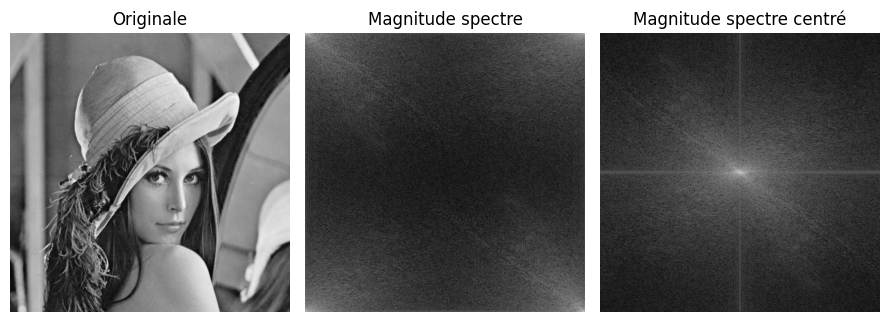

In [4]:
show_images([img,magnitude_spectrum,magnitude_spectrum_centered],mode=1,gray=True,titre=["Originale","Magnitude spectre","Magnitude spectre centré"])

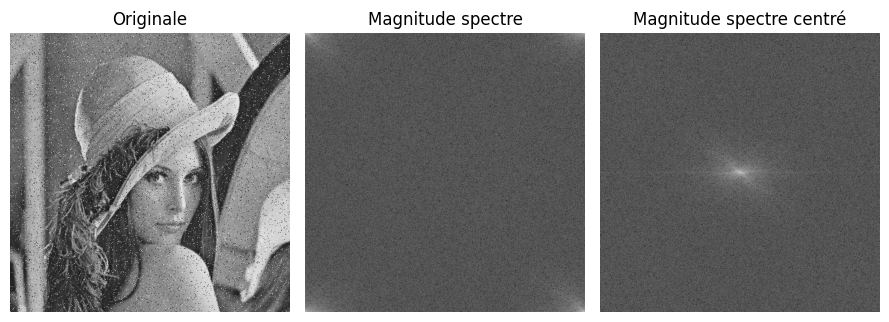

In [5]:
show_images([imgb,magnitude_spectrumb,magnitude_spectrum_centeredb],mode=255,gray=True,titre=["Originale","Magnitude spectre","Magnitude spectre centré"])

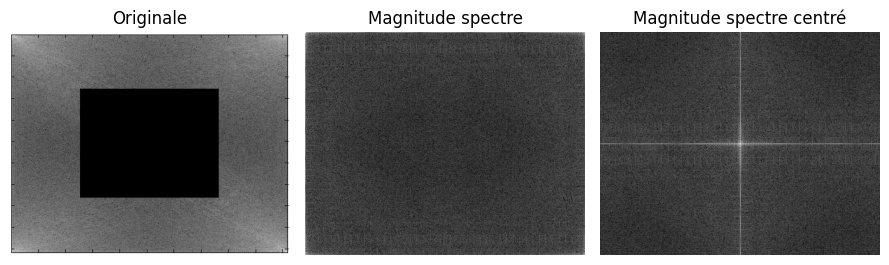

In [6]:
show_images([img1,magnitude_spectrum1,magnitude_spectrum_centered1],mode=1,gray=True,titre=["Originale","Magnitude spectre","Magnitude spectre centré"])

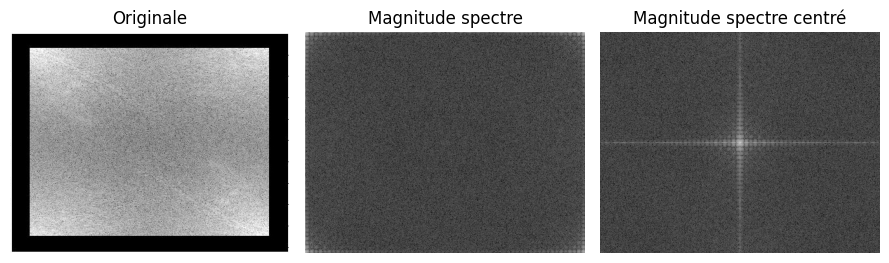

In [7]:
show_images([img2,magnitude_spectrum2,magnitude_spectrum_centered2],mode=1,gray=True,titre=["Originale","Magnitude spectre","Magnitude spectre centré"])

## 2. Localisation des hautes et des basses fréquences

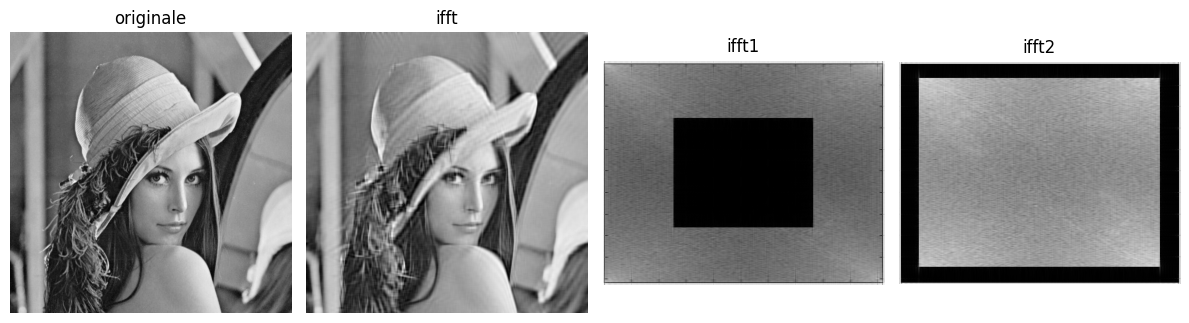

In [19]:
def passe_haut(FFT,coef):
    img_r=np.fft.fftshift(FFT)
    rows,cols=FFT.shape
    mid_row,mid_col=rows//2,cols//2
    pad=int((rows*cols*coef/100)**0.5//2)
    img_r[mid_row-pad:mid_row+pad,mid_col-pad:mid_col+pad]=0
    img_r=np.fft.ifftshift(img_r)
    return img_r

def passe_bas(FFT,coef):
    img_r=np.copy(FFT)
    rows,cols=FFT.shape
    mid_row,mid_col=rows//2,cols//2
    pad=int((rows*cols*coef/100)**0.5//2)
    img_r[mid_row-pad:mid_row+pad,mid_col-pad:mid_col+pad]=0
    return img_r

reduction0=passe_bas(fft,80)
reduction1=passe_bas(fft1,75)
reduction2=passe_bas(fft2,75)
ifft=log_image(np.fft.ifft2(reduction0))
ifft1=log_image(np.fft.ifft2(reduction1))
ifft2=log_image(np.fft.ifft2(reduction2))
show_images([img,ifft,ifft1,ifft2],mode=1,gray=True,titre=["originale","ifft","ifft1","ifft2"])


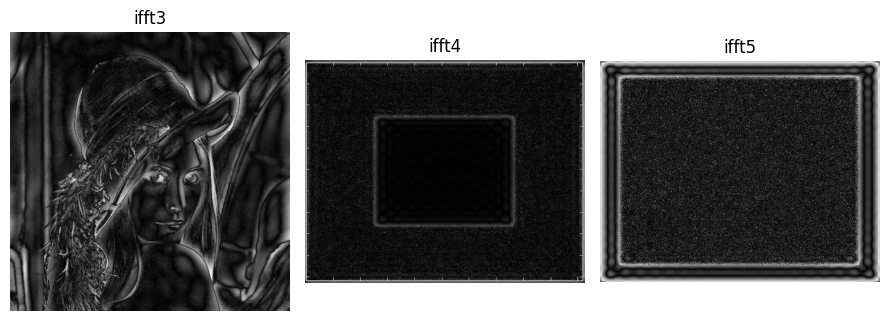

In [15]:
reduction3=passe_haut(fft,0.1)
reduction4=passe_haut(fft1,1)
reduction5=passe_haut(fft2,1)
ifft3=log_image(np.fft.ifft2(reduction3))
ifft4=log_image(np.fft.ifft2(reduction4))
ifft5=log_image(np.fft.ifft2(reduction5))
show_images([ifft3,ifft4,ifft5],mode=1,gray=True,titre=["ifft3","ifft4","ifft5"])

Les hautes fréquences sont au centres et les basses frequences sont sur les bords.

## 3. Réduction du bruit dans une image

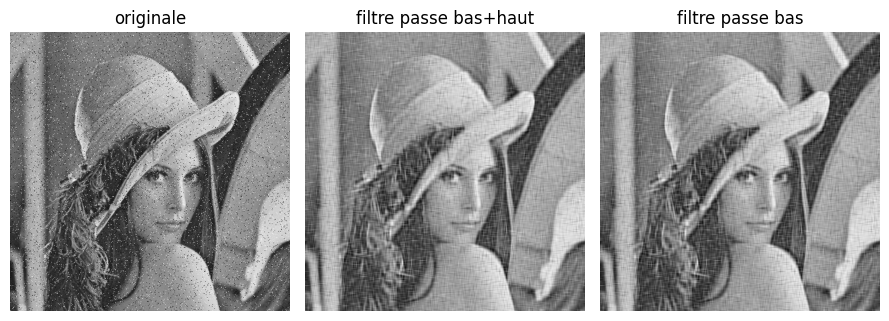

1223.9509780451247
142495.59286433065


In [10]:
reductionb3=passe_bas(fftb,80)
reductionb2=passe_haut(fftb,90)
ifftb3=log_image(np.fft.ifft2(reductionb3))
ifftb2=log_image(np.fft.ifft2(reductionb2))
reductionb=passe_bas(fftb-reductionb2,80)
ifftb=log_image(np.fft.ifft2(reductionb))
show_images([imgb,ifftb,ifftb3],mode=1,gray=True,titre=["originale","filtre passe bas+haut","filtre passe bas"])
print(np.sum(ifftb-ifftb3))
print(np.sum(ifftb))

In [22]:
def median(arr1,taille):
    n1,n2=arr1.shape
    n3,n4=taille,taille
    imgf=np.copy(arr1).astype(float)
    pad_row=n4//2
    pad_col=n3//2
    imgf=np.pad(imgf, [pad_row,pad_col], mode='constant', constant_values=0) #contour 0
    imgr=np.zeros((n1,n2),dtype=float)
    for i in range(n1):
        for j in range(n2):
            tmp=np.sort(np.ravel(imgf[i:i+n3,j:j+n4]))[taille**2//2]
            imgr[i,j]= tmp
    return imgr
img_median=median(imgb,3)


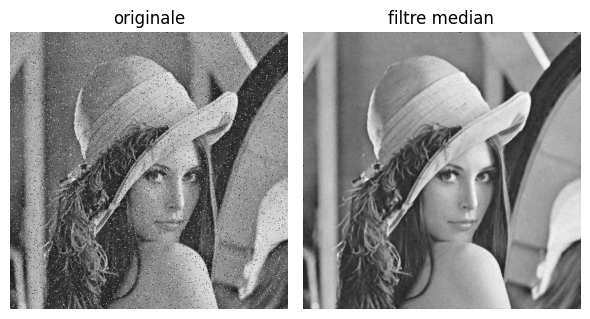

In [23]:
show_images([imgb,img_median],mode=1,gray=True,titre=["originale","filtre median"])